## Telecom Churn Analysis

• State: US state in which the customer resides

• Account length: The number of days that this account has been active

• Area code: The three-digit area code of the corresponding customer’s phone number

• International plan: Customer has an international calling plan: YES / NO

• Voice mail plan: Customer has a voice mail feature: YES / NO

• Number vmail messages: average number of voice mail messages per month

• Total day minutes: total number of calling minutes used during the day

• Total day calls: total number of calls placed during the day

• Total day charge: billed cost of daytime calls

• Total eve minutes: total number of calling minutes used during the evening 

• Total eve calls: total number of calls placed during the evening

• Total eve charge:  billed cost of evening time calls

• Total night minutes: total number of calling minutes used during the night

• Total night calls: the total number of calls placed during the night

• Total night charge: the billed cost of nighttime calls

• Total intl minutes: total number of international minutes

• Total intl calls: total number of international calls

• Total intl charge: billed cost for international calls

• Customer service calls: number of calls placed to Customer Service

• Churn: whether the customer left the service: True/False

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=(10,6)

## Importing Dataset

In [2]:
df=pd.read_csv('Telecom_Churn_Analysis.csv')
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

### Check basic information of dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [4]:
df['Churn'].mean()

0.145536384096024

#### 14% Customer Left the service

### Describe Dataset

In [5]:
df.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

### Check Unique Value in dataset

In [6]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [7]:
df['International plan'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df['Voice mail plan'].unique()

array(['Yes', 'No'], dtype=object)

### Cleaning 

### Check the count of Null values in data set

In [9]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

###  There is no Null Value in Dataset

### Churn Column Replace Bool Value to 0 & 1

In [10]:
df['Churn']=df['Churn'].replace({False:0, True:1})
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

## EDA

### Display Histogram of All numeric columns

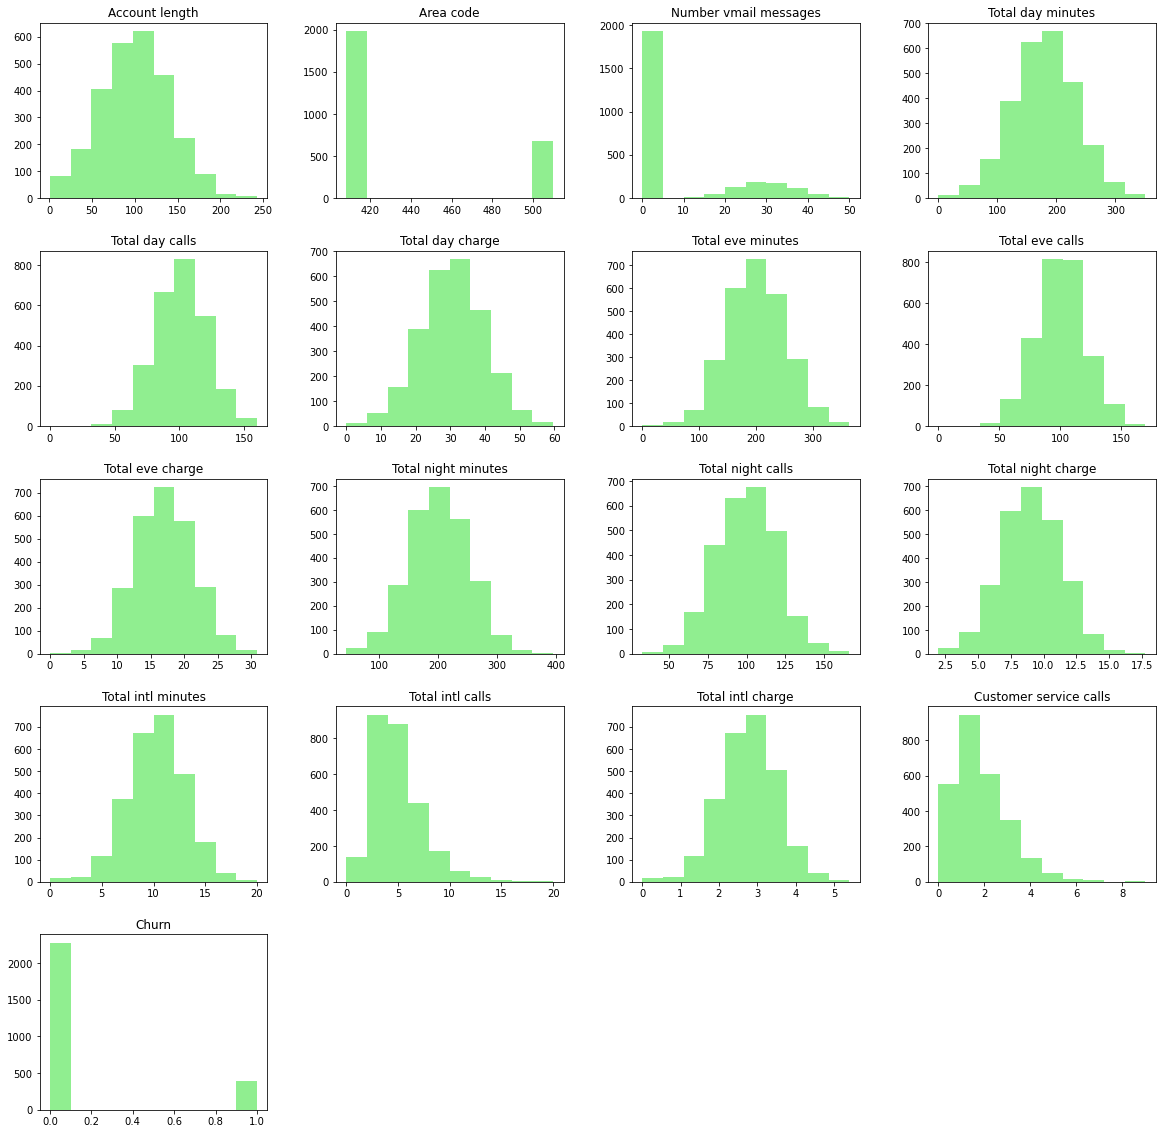

In [18]:
df.hist(figsize=(20,20), grid=False, color='lightgreen');

### Hear from Histo Grram, say that  Account length, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve  charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl charge Columns are Normal Distribution

### Check the churn column value count

In [12]:
df['Churn'].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

### Display count plot of Churn

In [13]:
sns.countplot(data=df, x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='count'>

### Check the International plan column value count

In [14]:
df['International plan'].value_counts()

No     2396
Yes     270
Name: International plan, dtype: int64

### Check the Voice mail plan column value count

In [15]:
df['Voice mail plan'].value_counts()

No     1933
Yes     733
Name: Voice mail plan, dtype: int64

###  Display the Pie Plot of International plan & Voice mail plan columns

<AxesSubplot:title={'center':'◈Voice mail plan count'}, ylabel='Voice mail plan'>

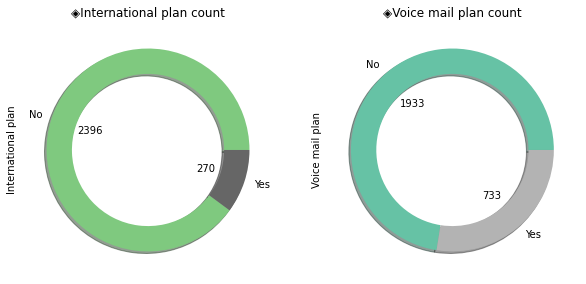

In [19]:
plt.subplot(1,2,1)
plt.title('◈International plan count')
df['International plan'].value_counts().plot(kind='pie', cmap='Accent', autopct=lambda p : '{:.0f}'.format(p * (df['International plan'].count()) / 100), wedgeprops=dict(width=.25), shadow=True)


plt.subplot(1,2,2)
plt.title('◈Voice mail plan count')
df['Voice mail plan'].value_counts().plot(kind='pie', autopct=lambda p : '{:.0f}'.format(p * (df['Voice mail plan'].count()) / 100), cmap='Set2',wedgeprops=dict(width=.25), shadow=True)

### Display the International plan & Voice mail plan count respect to Churn

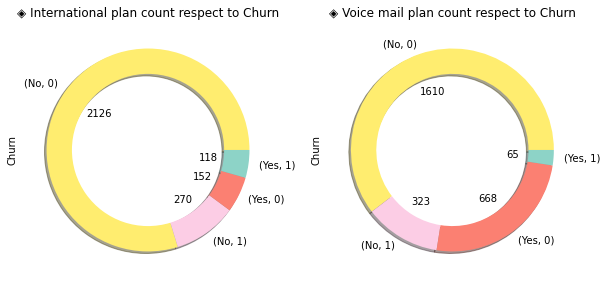

In [20]:
plt.subplot(1,2,1)
plt.title('◈ International plan count respect to Churn',)
df.groupby('International plan')['Churn'].value_counts().plot(kind='pie', autopct=lambda p : '{:.0f}'.format(p * (df['International plan'].count()) / 100), cmap='Set3_r',wedgeprops=dict(width=.25), shadow=True);

plt.subplot(1,2,2)
plt.title('◈ Voice mail plan count respect to Churn')
df.groupby('Voice mail plan')['Churn'].value_counts().plot(kind='pie' ,autopct=lambda p : '{:.0f}'.format(p * (df['Voice mail plan'].count()) / 100), cmap='Set3_r',wedgeprops=dict(width=.25), shadow=True);

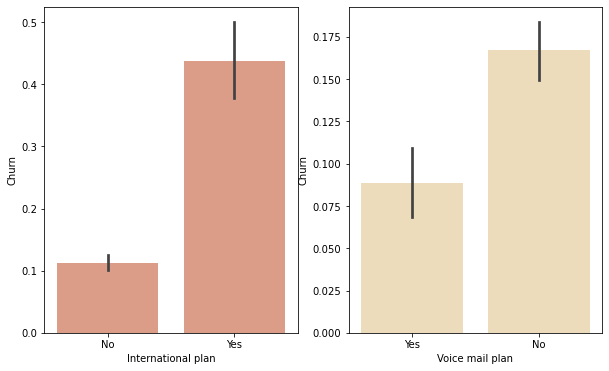

In [21]:

plt.subplot(1,2,1)
sns.barplot(data=df, x='International plan', y='Churn', color='darksalmon')

plt.subplot(1,2,2)
sns.barplot(data=df, x='Voice mail plan', y='Churn', color='wheat')

plt.show()

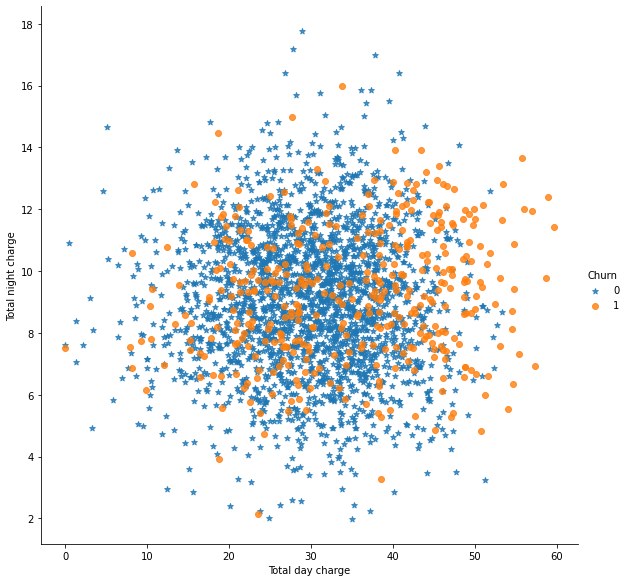

In [22]:
sns.lmplot(x='Total day charge', y='Total night charge', data=df, hue='Churn',markers=['*','o'],size=8,fit_reg=False);

###  Finds correlation between Independent and dependent attributes

<AxesSubplot:>

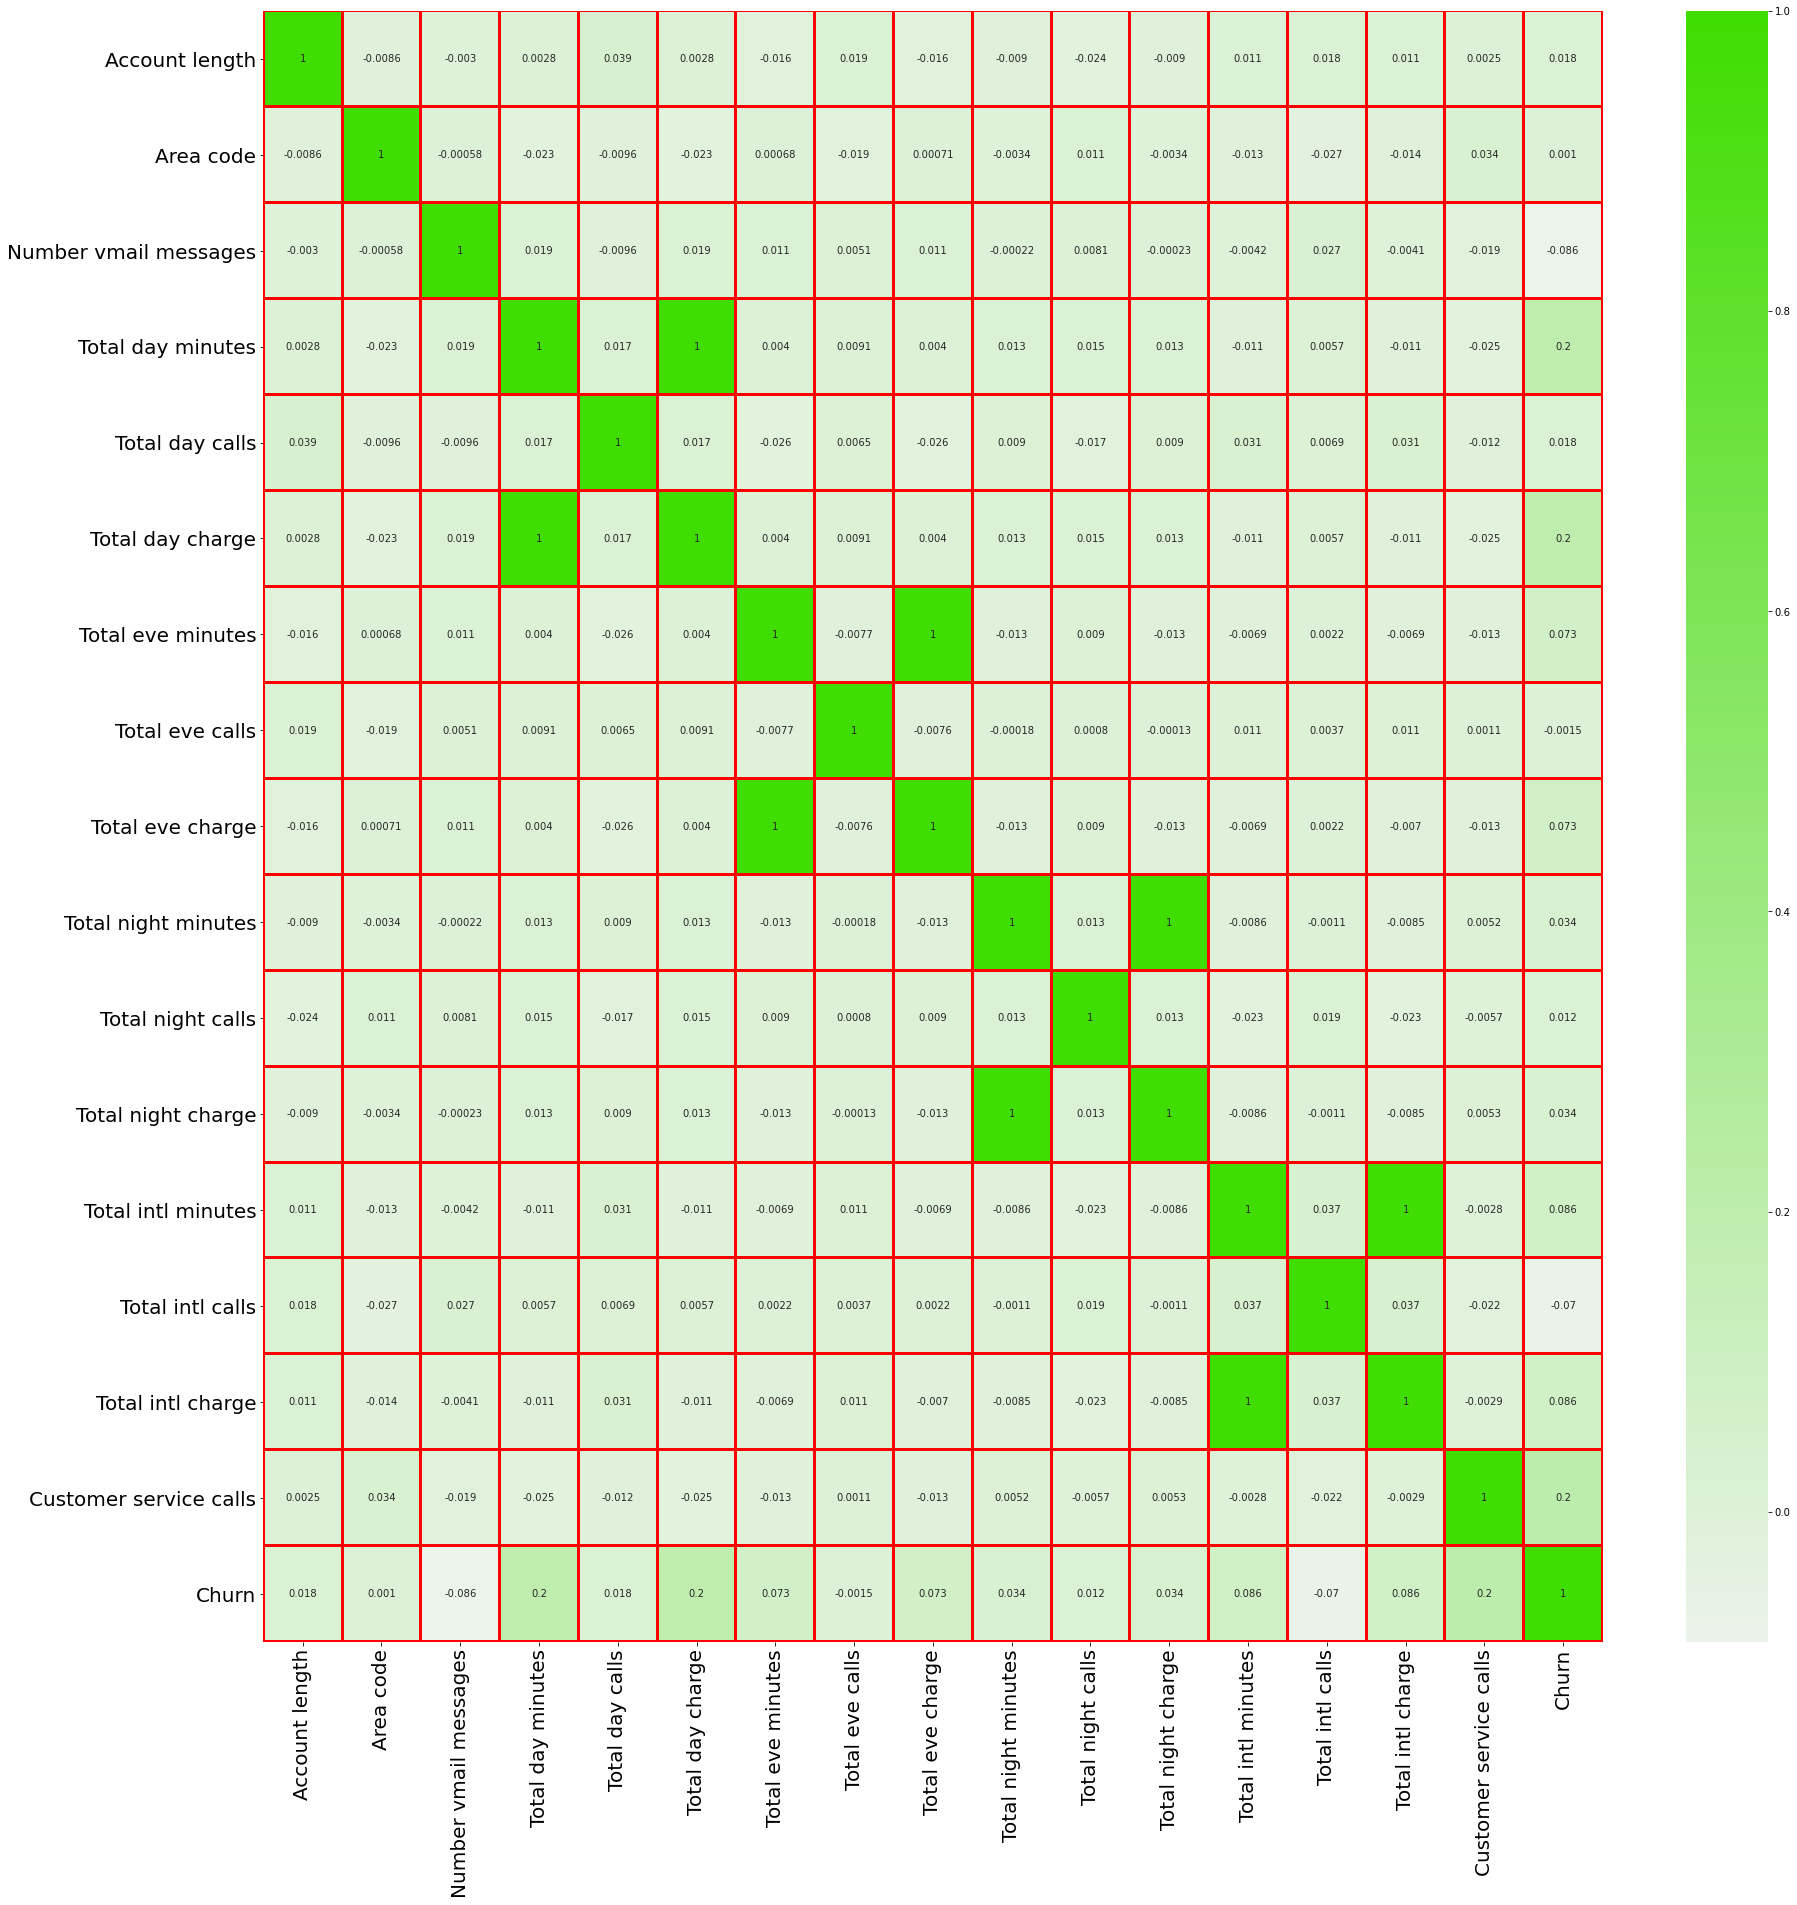

In [23]:
plt.figure(figsize=(30,30))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cmap = sns.light_palette('#3fdd01',as_cmap=True)
sns.heatmap(df.corr(),annot=True, cmap=cmap, linewidths=2, linecolor='red')

###  Total day minutes, Total day charge, Customer service call high corelation with Churn

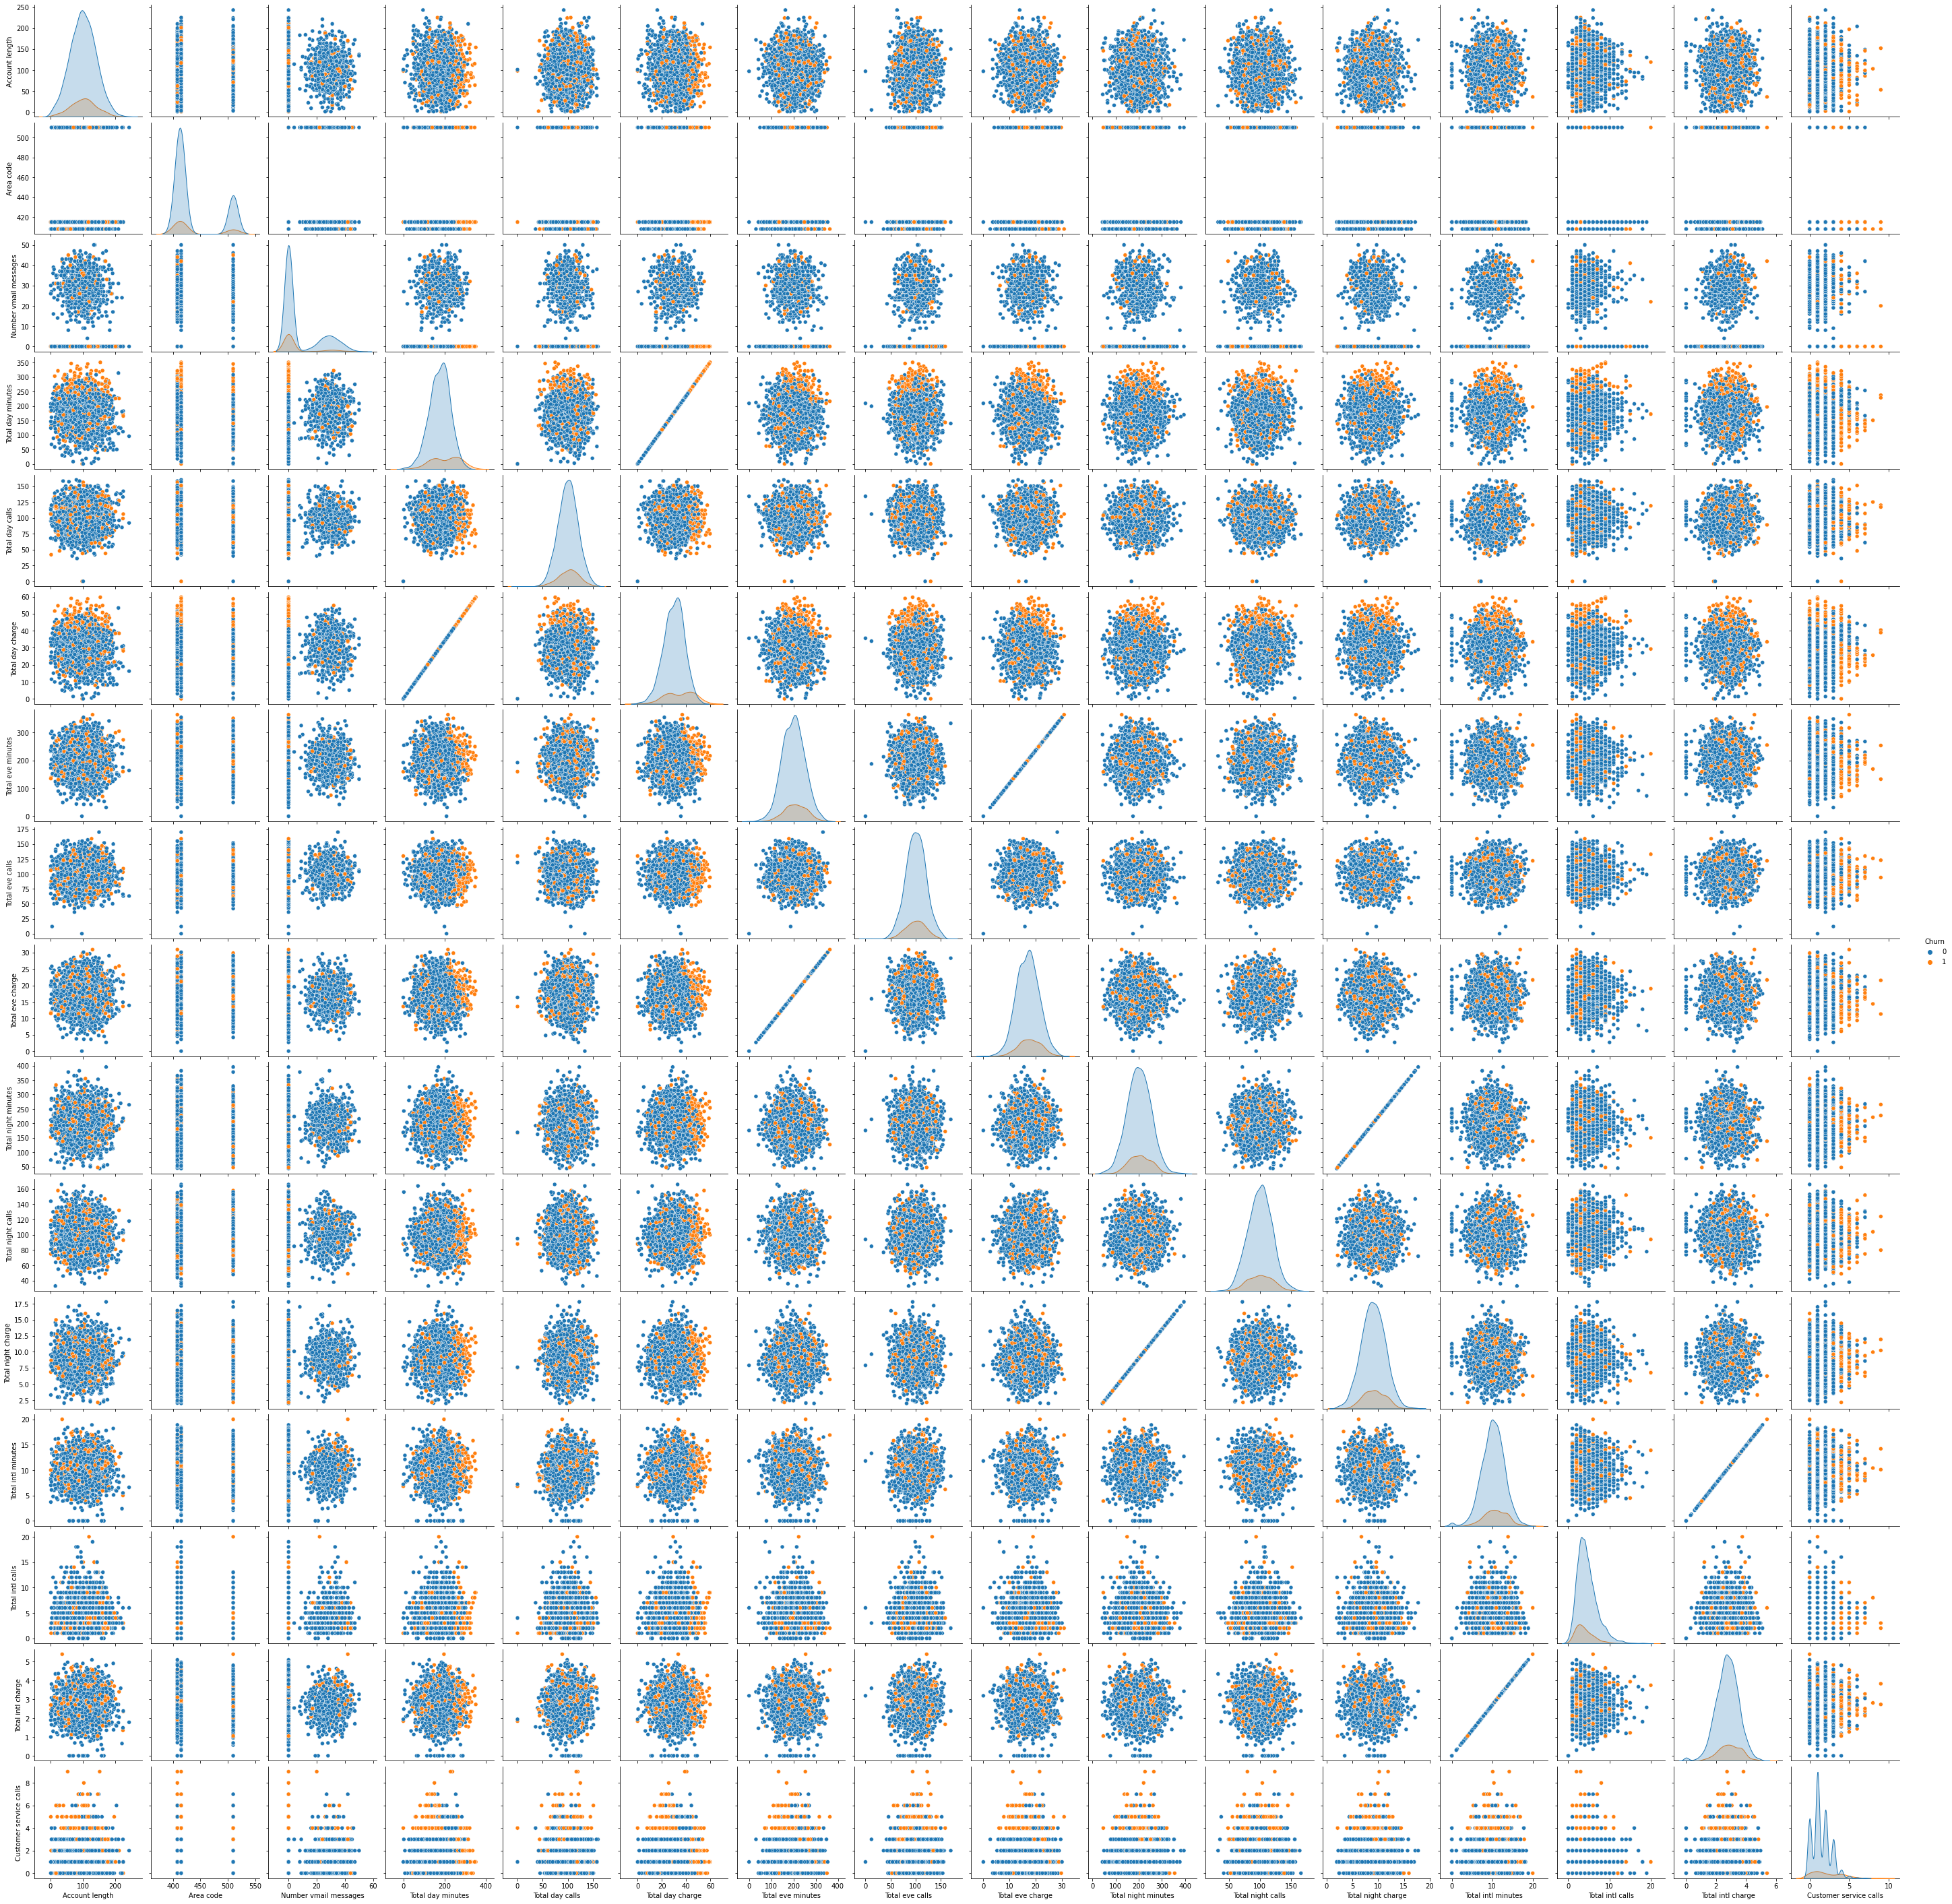

In [24]:
sns.pairplot(df, hue='Churn')

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

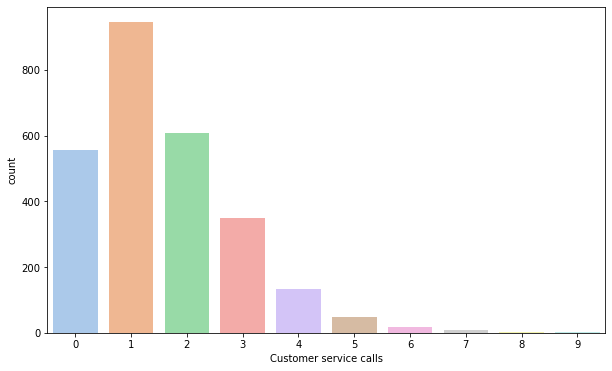

In [25]:
sns.countplot(x='Customer service calls', data=df, palette="pastel")

<AxesSubplot:xlabel='Churn', ylabel='Total day minutes'>

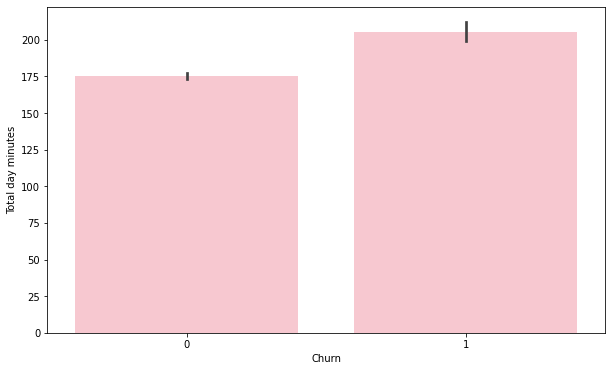

In [26]:
sns.barplot(data=df, x='Churn', y='Total day minutes', color='pink')

In [31]:
sns.barplot(data=df, x='Area code', y='Customer service calls', hue='Churn')

<AxesSubplot:xlabel='Churn', ylabel='Total day charge'>

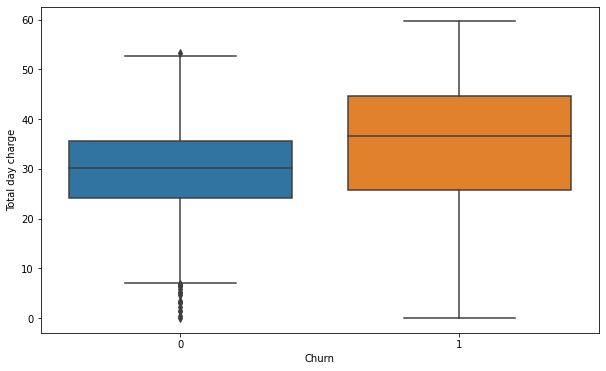

In [28]:
sns.boxplot(x='Churn', y='Total day charge', data=df)

## We can go for Machine Learning

In [30]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0

## Feature Engineering

### Apply Encoding in Categorical columns

### One-Hot Encoding

In [31]:
x=df.drop(['Churn'], axis=1)
y=df['Churn']

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [33]:
x=pd.get_dummies(x)
x.head()

Account length  Area code  Number vmail messages  Total day minutes  \
0             128        415                     25              265.1   
1             107        415                     26              161.6   
2             137        415                      0              243.4   
3              84        408                      0              299.4   
4              75        415                      0              166.7   

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0              110             45.07              197.4               99   
1              123             27.47              195.5              103   
2              114             41.38              121.2              110   
3               71             50.90               61.9               88   
4              113             28.34              148.3              122   

   Total eve charge  Total night minutes  ...  State_VA  State_VT  State_WA  \
0             16.78                244.7  ...         0         0         0   
1             16.62                254.4  ...         0         0         0   
2             10.30                162.6  ...         0         0         0   
3              5.26                196.9  ...         0         0         0   
4             12.61                186.9  ...         0         0         0   

   State_WI  State_WV  State_WY  International plan_No  \
0         0         0         0                      1   
1         0         0         0                      1   
2         0         0         0                      1   
3         0         0         0                      0   
4         0         0         0                      0   

   International plan_Yes  Voice mail plan_No  Voice mail plan_Yes  
0                       0                   0                    1  
1                       0                   0                    1  
2                       0                   1                    0  
3                       1                   1                    0  
4                       1                   1                    0  

[5 rows x 71 columns]

## Splitting the data in training and testing sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
 x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=13)

## Applying All Algorithms 

In [36]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [38]:
models={'LogisticRegression':LogisticRegression(),
        'SGDC':SGDClassifier(),
        'DecisionTree':DecisionTreeClassifier(),
        'RandomForest':RandomForestClassifier(),
        'KNN':KNeighborsClassifier(),
        'SVM':SVC()
       }

In [39]:
for name, model in models.items():
    model1=model.fit(x_train,y_train)
    y_pred = model1.predict(x_test)
    print(f'{name} accuracy score: {accuracy_score(y_test, y_pred)}')

LogisticRegression accuracy score: 0.8670411985018727
SGDC accuracy score: 0.8670411985018727
DecisionTree accuracy score: 0.9119850187265918
RandomForest accuracy score: 0.9456928838951311
KNN accuracy score: 0.8707865168539326
SVM accuracy score: 0.8670411985018727


### RandomForestClassifier which shows an accuracy of nearly 94%

### Here we see RandomForestClassifier gives us best score so we can use RandomForestClassifier algorithm

## Algorithm selected: RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
y_pred = reg_rf.predict(x_test)

In [42]:
reg_rf.score(x_train, y_train)

1.0

In [43]:
reg_rf.score(x_test, y_test)

0.9419475655430711

### The next step consists of finding the combination of hyperparameters

### Perform Hyper-Prameter tuning using RandomizedSearchCV

In [44]:
from sklearn.model_selection import RandomizedSearchCV

### create list for all possible parameter

In [45]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [47]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [48]:
rf_random = RandomizedSearchCV(estimator = reg_rf, 
                               param_distributions = random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 1)

In [49]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [50]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [51]:
rf_random_pred=rf_random.predict(x_test)

In [52]:
accuracy_score(y_test, rf_random_pred)

0.9419475655430711

### Performace of the model

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [54]:
print(f'confusion_matrix:- \n {confusion_matrix(y_test,rf_random_pred)}\n')
print(f'classification report:- \n{classification_report(y_test,rf_random_pred)}')

confusion_matrix:- 
 [[461   2]
 [ 29  42]]

classification report:- 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       463
           1       0.95      0.59      0.73        71

    accuracy                           0.94       534
   macro avg       0.95      0.79      0.85       534
weighted avg       0.94      0.94      0.94       534



## Save Model

In [55]:
import pickle
telecom_model=open('telecon_model.sav','wb')
pickle.dump(rf_random,telecom_model)